# 소프트맥스 회귀 ( Softmax Regression )

>**목차**
1. 개념정리
3. 원-핫 벡터
3. 실습


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

## 1. 개념정리
---


<br>

###<center> < 가설 > </center>
###  <center>$f(x)=softmax(xW+b)$</center>

<br>

### <center> < 목적 > </center>
### <center>$(w^{*}, b^{*})=arg \; min \;J(y, \hat{y})$</center>
### <center> $ =arg \; min \;J(y, f(x))$</center>
### <center> $ =arg \; min \;J(y, softmax(xW+b))$</center>

### **소프트맥스 함수 ( Softmax funtion )**

<br>

### <center> $softmax(x)_k = \frac{1}{\sum_{j=1}^{d}e^{(x_j)}}e(x_k)$

<br>

### <center> $softmax(x) = [\frac{e(x_1)}{\sum_{j=1}^{d}e^{(x_j)}}, \frac{e(x_2)}{\sum_{j=1}^{d}e^{(x_j)}} ... \frac{e(x_d)}{\sum_{j=1}^{d}e^{(x_j)}}]$

* 구현

In [ ]:
def softmax(x):
    _norm = sum([np.exp(xj) for xj in x])
    return np.array([np.exp(xk)/_norm for xk in x])

* 예제
  * $ x_1 = (2,1,1)$
  * $ x_2 = (2,5,3)$
  * $ x_3 = (-1,2,5)$

In [ ]:
softmax((2,1,1)), softmax((2,5,3)), softmax((-1,2,5))

(array([0.57611688, 0.21194156, 0.21194156]),
 array([0.04201007, 0.84379473, 0.1141952 ]),
 array([0.00235563, 0.04731416, 0.95033021]))

### **가설 구현**
###<center>$f(x)=softmax(xW+b)$</center>

In [ ]:
def hypothesis(x, W, b=0):
  return softmax(np.dot(x,W)+b)

### **예제**

|X|
|------|
|-3|
|-2|
|-1|
|0|
|1|
|2|
|3|


* 데이터 정의



In [ ]:
X  = np.array( [[-3],
                [-2],
                [-1],
                [0],
                [1],
                [2],
                [3]] )

* 예측

In [ ]:
W = np.array([[1,1,1]])
print("W shape:", W.shape)

for x in X:
  y_pred = hypothesis(x,W)
  print(x, y_pred)

W shape: (1, 3)
[-3] [0.33333333 0.33333333 0.33333333]
[-2] [0.33333333 0.33333333 0.33333333]
[-1] [0.33333333 0.33333333 0.33333333]
[0] [0.33333333 0.33333333 0.33333333]
[1] [0.33333333 0.33333333 0.33333333]
[2] [0.33333333 0.33333333 0.33333333]
[3] [0.33333333 0.33333333 0.33333333]


## 2. 원-핫 벡터 (Cross Entropy)
---

|X|Y|
|---|--|
|-3|패배|
|-2|패배|
|-1|패배|
|0|무승부|
|1|무승부|
|2|승리|
|3|승리|


* 데이터 정의
```
from tensorflow.keras.utils import to_categorical
y_data_onehot = to_categorical(y_data, num_classes=3)
```


In [ ]:
Y = [[1,0,0],
     [1,0,0],
     [1,0,0],
     [0,1,0],
     [0,1,0],
     [0,0,0],
     [0,0,0]]


## 3. 실습
---

### **데이터**
|공부시간|집중도|수면시간|종합성적|합격여부|
|------|---|---|---|---|
|0|1|9|0|불합격|
|1|1|8.5|1.1|불합격|
|2|2|8|2.3|불합격|
|3|4|8|3.0|유예|
|4|3|7|4.4|유예|
|5|5|7.5|5.5|유예|
|6|6|7|6.1|유예|
|7|6|6|7.3|합격|
|8|7|7|8.4|합격|
|9|6|6.5|9.8|합격|

* 데이터 정의

In [ ]:
X = [[0,1,9,0],
      [1,1,8.5,1.1],
      [2,2,8,2.3],
      [3,4,8,3.0],
      [4,3,7,4.4],
      [5,5,7.5,5.5],
      [6,6,7,6.1],
      [7,6,6,7.3],
      [8,7,7,8.4],
      [9,6,6.5,9.8]
     ]
Y = [[1,0,0],
     [1,0,0],
     [0,1,0],
     [0,1,0],
     [0,1,0],
     [0,1,0],
     [0,0,1],
     [0,0,1],
     [0,0,1],
     [0,0,1]]

* 시각화 

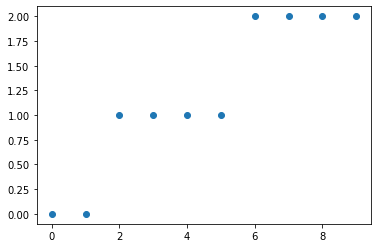

In [ ]:
plt.plot([np.argmax(y) for y in Y], marker='o', linestyle='')
plt.show()

###  **모델 생성**

* 케라스를 이용한 모델 구현

In [ ]:
model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


* 학습 파라미터 확인

In [ ]:
print(model.get_weights())
W = model.get_weights()[0]
b = model.get_weights()[1]
print("W:",W, "b:", b)

[array([[ 0.88135946,  0.69768155, -0.9064976 ],
       [-0.6657736 ,  0.6846844 , -0.3791411 ],
       [ 0.5923662 , -0.88884807,  0.29585838],
       [-0.3345332 ,  0.45191228,  0.04367417]], dtype=float32), array([0., 0., 0.], dtype=float32)]
W: [[ 0.88135946  0.69768155 -0.9064976 ]
 [-0.6657736   0.6846844  -0.3791411 ]
 [ 0.5923662  -0.88884807  0.29585838]
 [-0.3345332   0.45191228  0.04367417]] b: [0. 0. 0.]


* 시각화

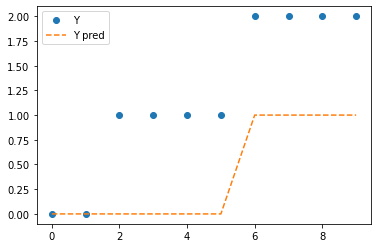

In [ ]:
Y_pred = model.predict(X)
plt.plot([np.argmax(y) for y in Y], marker='o', linestyle='')
plt.plot([np.argmax(y_pred) for y_pred in Y_pred], marker='', linestyle='--')
plt.legend(["Y","Y pred"])
plt.show()

### **모델 학습**

* 모델 컴파일

In [ ]:
model.compile(optimizer = optimizers.SGD(learning_rate=0.01),
              loss = 'categorical_crossentropy',
              metrics=['acc']
              )

* 학습 진행

In [ ]:
model.fit(x, y, epochs=100)

### **결과**

* 학습 파라미터 확인

In [ ]:
print(model.get_weights())
W = model.get_weights()[0]
b = model.get_weights()[1]
print("W:",W, "b:", b)

[array([[ 0.5827152 ,  0.1499458 , -0.06011748],
       [-0.9254058 ,  0.37467963,  0.19049565],
       [ 0.3587985 ,  0.04415605, -0.40357792],
       [-0.66107404, -0.07006586,  0.8921932 ]], dtype=float32), array([-0.03993933,  0.09542379, -0.05548444], dtype=float32)]
W: [[ 0.5827152   0.1499458  -0.06011748]
 [-0.9254058   0.37467963  0.19049565]
 [ 0.3587985   0.04415605 -0.40357792]
 [-0.66107404 -0.07006586  0.8921932 ]] b: [-0.03993933  0.09542379 -0.05548444]


* 예측

In [ ]:
Y_pred = model.predict(X)
print(Y_pred)

[[7.9958379e-01 1.9789922e-01 2.5169810e-03]
 [7.2813529e-01 2.6212308e-01 9.7415941e-03]
 [3.0853310e-01 6.2891954e-01 6.2547393e-02]
 [3.2386761e-02 8.7221092e-01 9.5402308e-02]
 [3.9237101e-02 5.8528769e-01 3.7547520e-01]
 [2.5570162e-03 5.4539561e-01 4.5204729e-01]
 [5.2547531e-04 4.4517183e-01 5.5430275e-01]
 [1.0872459e-04 1.6634403e-01 8.3354729e-01]
 [2.7181495e-05 1.3845673e-01 8.6151612e-01]
 [1.3747435e-05 3.3140391e-02 9.6684587e-01]]


* 시각화

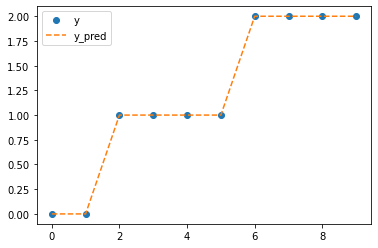

In [ ]:
plt.plot([np.argmax(y) for y in Y], marker='o', linestyle='')
plt.plot([np.argmax(y_pred) for y_pred in Y_pred], marker='', linestyle='--')
plt.legend(["y","y_pred"])
plt.show()